In [1]:
from datetime import datetime, timedelta
from dateutil.parser import parse
import pandas as pd
from bars import Bars, plot_diff
from constants import *
from matplotlib.pyplot import gca, legend, figure

In [2]:
def filtered_data_for_date(release_dt, earliest_dt, area_type):
    earliest=pd.to_datetime(earliest_dt)+pd.Timedelta(1, 'D')
    return Bars(area_type=area_type, earliest=earliest, average_days=0).data_for(release_dt)[0]

In [3]:
trim = '2020-09-01'
area_type = region

<Figure size 720x288 with 0 Axes>

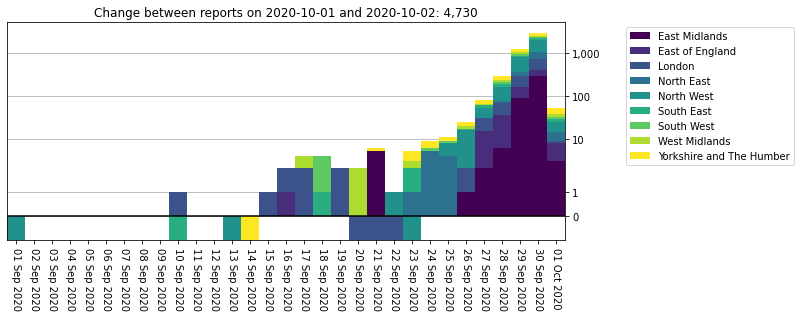

In [4]:
d2 = datetime(2020, 10, 2).date()
delta = 1
d1 = d2 - timedelta(days=delta)
new_data = filtered_data_for_date(d2, trim, area_type)
old_data = filtered_data_for_date(d1, trim, area_type)

figure(figsize=(10, 4), facecolor='white')
figure(figsize=(10, 4), facecolor='white')
plot_diff(gca(), d2, new_data, d1, old_data, diff_ylims=None, diff_log_scale=True)
_ = legend(bbox_to_anchor=(1.1, 1))

<Figure size 720x288 with 0 Axes>

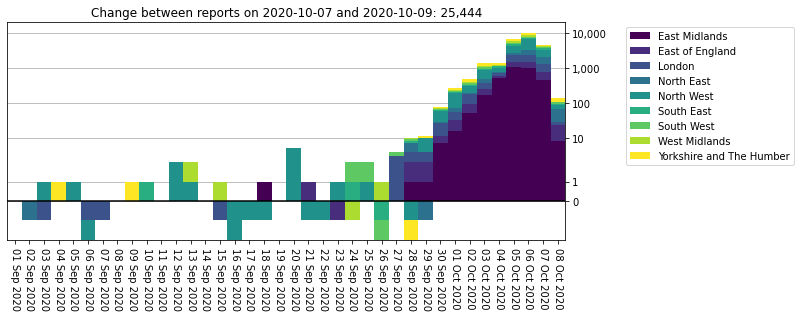

In [5]:
d2 = datetime(2020, 10, 9).date()
delta = 2
d1 = d2 - timedelta(days=delta)
new_data = filtered_data_for_date(d2, trim, area_type)
old_data = filtered_data_for_date(d1, trim, area_type)

figure(figsize=(10, 4), facecolor='white')
figure(figsize=(10, 4), facecolor='white')
plot_diff(gca(), d2, new_data, d1, old_data, diff_ylims=None, diff_log_scale=True)
_ = legend(bbox_to_anchor=(1.1, 1))

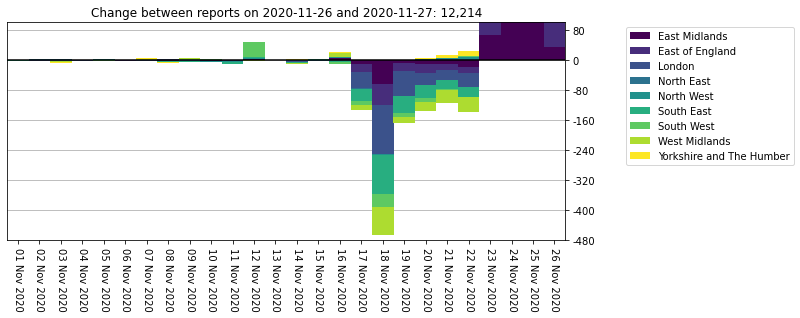

In [6]:
d2 = datetime(2020, 11, 27).date()
delta = 1
d1 = d2 - timedelta(days=delta)
trim = '2020-11-01'
new_data = filtered_data_for_date(d2, trim, area_type)
old_data = filtered_data_for_date(d1, trim, area_type)

figure(figsize=(10, 4), facecolor='white')
plot_diff(gca(), d2, new_data, d1, old_data, diff_ylims=[-480, 100], diff_log_scale=False)
_ = legend(bbox_to_anchor=(1.1, 1))

In [7]:
new_data = filtered_data_for_date(d2, trim, area_type)
old_data = filtered_data_for_date(d1, trim, area_type)

diff = new_data.sub(old_data, fill_value=0)
diff['Total'] = diff.sum(axis=1)
i = diff.where(diff['Total']<-100).dropna()
i

areaName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber,Total
date,,,,,,,,,,
2020-11-17,-10.0,-21.0,-45.0,-1.0,-1.0,-32.0,-11.0,-12.0,0.0,-133.0
2020-11-18,-64.0,-56.0,-130.0,0.0,-3.0,-104.0,-35.0,-76.0,0.0,-468.0
2020-11-19,-9.0,-21.0,-65.0,1.0,-1.0,-45.0,-11.0,-15.0,0.0,-166.0
2020-11-20,-12.0,-24.0,-30.0,0.0,2.0,-35.0,-10.0,-24.0,4.0,-129.0
2020-11-21,-12.0,-16.0,-26.0,2.0,3.0,-23.0,-2.0,-37.0,8.0,-103.0
2020-11-22,-19.0,-17.0,-37.0,2.0,7.0,-27.0,1.0,-40.0,15.0,-115.0


In [8]:
i['Total'].sum()

-1114.0

In [9]:
i[i.columns[(i<-10).any()]]

areaName,East Midlands,East of England,London,South East,South West,West Midlands,Total
date,,,,,,,
2020-11-17,-10.0,-21.0,-45.0,-32.0,-11.0,-12.0,-133.0
2020-11-18,-64.0,-56.0,-130.0,-104.0,-35.0,-76.0,-468.0
2020-11-19,-9.0,-21.0,-65.0,-45.0,-11.0,-15.0,-166.0
2020-11-20,-12.0,-24.0,-30.0,-35.0,-10.0,-24.0,-129.0
2020-11-21,-12.0,-16.0,-26.0,-23.0,-2.0,-37.0,-103.0
2020-11-22,-19.0,-17.0,-37.0,-27.0,1.0,-40.0,-115.0


In [10]:
area_type=ltla
new_data = filtered_data_for_date(d2, trim, area_type)
old_data = filtered_data_for_date(d1, trim, area_type)
diff = new_data.sub(old_data, fill_value=0)
a = diff[diff.sum(axis=1)< -100].transpose(copy=True)
i = a.loc[~((a >=0).all(axis=1))].copy()
total = i['Total'] = i.sum(axis=1)
result = i[total<-3].sort_values('Total')[:10]
result

date,2020-11-17 00:00:00,2020-11-18 00:00:00,2020-11-19 00:00:00,2020-11-20 00:00:00,Total
areaName,,,,,
Bromley,-3.0,-12.0,-5.0,-2.0,-22.0
Barnet,-2.0,-9.0,-8.0,-3.0,-22.0
Birmingham,-2.0,-11.0,-4.0,-3.0,-20.0
Lambeth,-1.0,-13.0,-3.0,-1.0,-18.0
Thanet,-1.0,-2.0,-5.0,-4.0,-12.0
Redbridge,-7.0,-3.0,-1.0,-1.0,-12.0
Luton,0.0,-10.0,-1.0,-1.0,-12.0
Leicester,-5.0,-4.0,-2.0,-1.0,-12.0
Hillingdon,0.0,-4.0,-3.0,-4.0,-11.0


In [11]:
', '.join(result.index)

'Bromley, Barnet, Birmingham, Lambeth, Thanet, Redbridge, Luton, Leicester, Hillingdon, Havering'